In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("SaYoPillow.csv")
df.head()


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["sl"] = label_encoder.fit_transform(df["sl"])  # 'sl' is the stress level column


In [ ]:
print(df.info())
df['sl'] = df['sl'].replace({0:'low/normal',1:'medium low',2:'medium',3:'medium high',4:'high'})
df['sl'].value_counts()

# Encode target
le = LabelEncoder()
df['sl_encoded'] = le.fit_transform(df['sl'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB
None


In [ ]:
X = df.drop(['sl', 'sl_encoded'], axis=1)
y = df['sl_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Random Forest Accuracy: 0.9762
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.96      1.00      0.98        23
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        26
           4       1.00      0.92      0.96        24

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

XGBoost Accuracy: 0.9762
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      1.00      0.98        23
           2       0.93      1.00      0.97        28
           3       1.00      0.96      0.98        26
           4       1.00      0.92      0.96        24

    accuracy                           0.98       126
   macro avg       0.98      

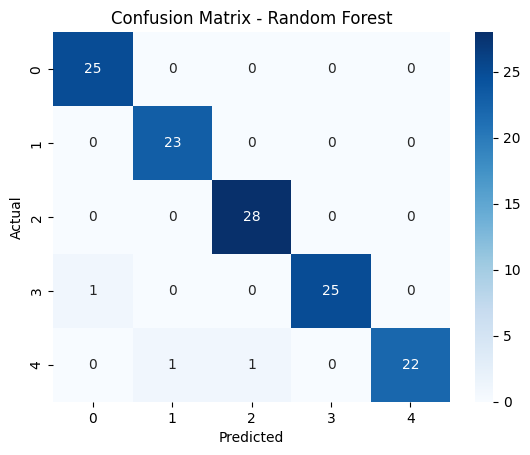

In [ ]:
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


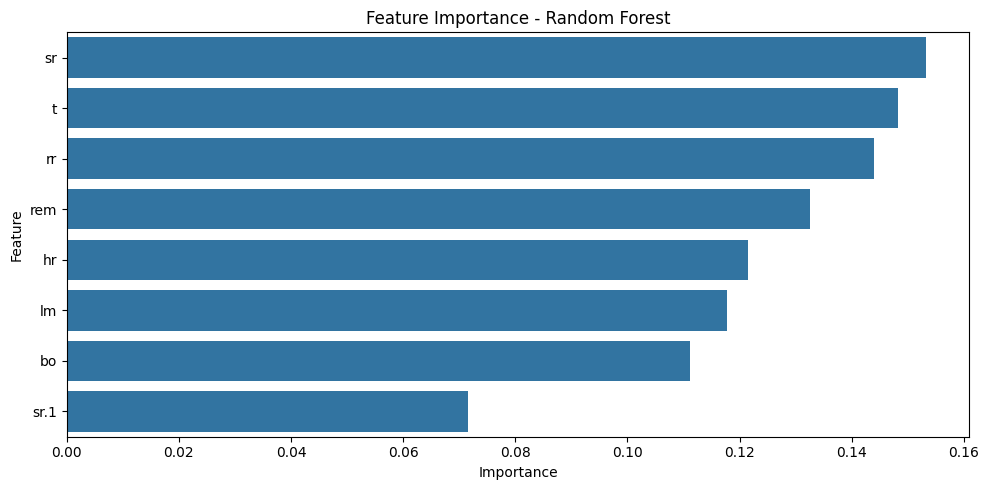

In [ ]:
importances = best_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [16]:


import joblib
import os

# Make the 'models/' directory if not exists
os.makedirs("models", exist_ok=True)

# Save model and encoder
joblib.dump(model, "models/random_forest_model.pkl")
joblib.dump(label_encoder, "models/label_encoder.pkl")


['models/label_encoder.pkl']